In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv",nrows=1000000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
test=pd.read_csv("test.csv")
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
train.shape,test.shape

((1000000, 8), (9914, 7))

In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [7]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [9]:
train.shape

(999990, 8)

In [10]:
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [11]:
#train[train['fare_amount']<0].count()
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 999952, True: 38})

In [12]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(999952, 8)

In [13]:
train['fare_amount'].describe()

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

Next check the passenger_count variable

In [14]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [15]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [16]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [17]:
train['passenger_count'].describe()

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

### Next, let us explore the pickup latitude and longitudes

In [18]:
train['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

Quick Googling gave me this info
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them

In [19]:
train[(train['pickup_latitude']>90) | (train['pickup_latitude']<-90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1


In [20]:
#We need to drop these outliers
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [21]:
train.shape

(999939, 8)

In [22]:
#similar operation for pickup longitude
train['pickup_longitude'].describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [23]:
train[(train['pickup_longitude']<-180) | (train['pickup_longitude']<-180)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [24]:
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)

In [25]:
train.shape

(999928, 8)

In [26]:
#similar operation for dropoff latitude and longitude
train[(train['dropoff_latitude']<-90) | (train['dropoff_latitude']>90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59 UTC,-73.977635,40.754687,-73.870432,405.650000,1
579901,2013-08-14 20:23:00.000000245,18.0,2013-08-14 20:23:00 UTC,-73.999190,40.720200,-0.360000,-3114.338567,1
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00 UTC,-73.870875,40.773792,-73.977790,404.716667,1
748464,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00 UTC,-74.015200,40.709665,-40.719295,1651.553433,5
889704,2012-05-21 12:15:00.00000098,15.3,2012-05-21 12:15:00 UTC,-74.001292,40.727560,-73.953047,404.466667,1


In [27]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [28]:
train.shape

(999920, 8)

In [29]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [30]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [31]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [32]:
train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

## EDA

Now, for EDA. The following are my considerations -

* Does the number of passengers affect the fare?
* Does the date and time of pickup affect the fare?
* Does the day of the week affect the fare?
* Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following -

* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
###### create a new field 'distance' to fetch the distance between the pickup and the drop.

Finding distances based on Latitude and Longitude.

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

##### Formula

dlon = lon2 - lon1

dlat = lat2 - lat1

a = (sin(dlat/2))^2 + cos(lat1) cos(lat2) (sin(dlon/2))^2

c = 2 * atan2( sqrt(a), sqrt(1-a) )

d = R * c (where R is the radius of the Earth)

In [33]:
def haversine_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
    data = [train, test]
    for i in data:
        pickup_lat  = np.radians(i["pickup_latitude"])
        pickup_lon  = np.radians(i["pickup_longitude"])
        dropoff_lat = np.radians(i["dropoff_latitude"])
        dropoff_lon = np.radians(i["dropoff_longitude"])

        dist_lon = dropoff_lon - pickup_lon
        dist_lat = dropoff_lat - pickup_lat

#Formula
        R = 6371  #radius of earth in kilometers
        a = (np.sin(dist_lat/2))**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * (np.sin(dist_lon/2))**2 
        c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) ) 
        d = R * c #(where R is the radius of the Earth)
        i['H_Distance'] = d
    return d
    

In [34]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [35]:
train.H_Distance.describe()

count    999920.000000
mean         18.937799
std         360.783100
min           0.000000
25%           1.212960
50%           2.115908
75%           3.882263
max       12594.704725
Name: H_Distance, dtype: float64

In [36]:
Counter(train['H_Distance']>3)

Counter({False: 655704, True: 344216})

In [37]:
train.H_Distance.head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: H_Distance, dtype: float64

In [38]:
test.H_Distance.head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: H_Distance, dtype: float64

In [39]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [40]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [41]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [42]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [43]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


### 1. Does the number of passengers affect the fare?

Text(0,0.5,'Frequency')

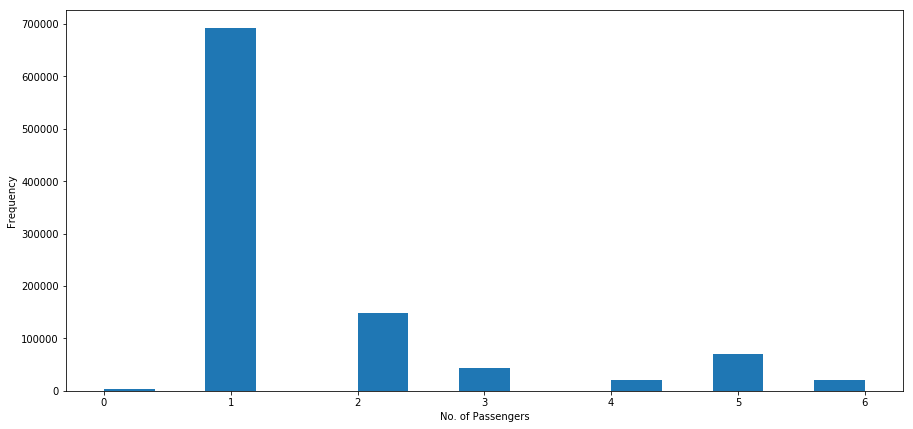

In [44]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0,0.5,'Fare')

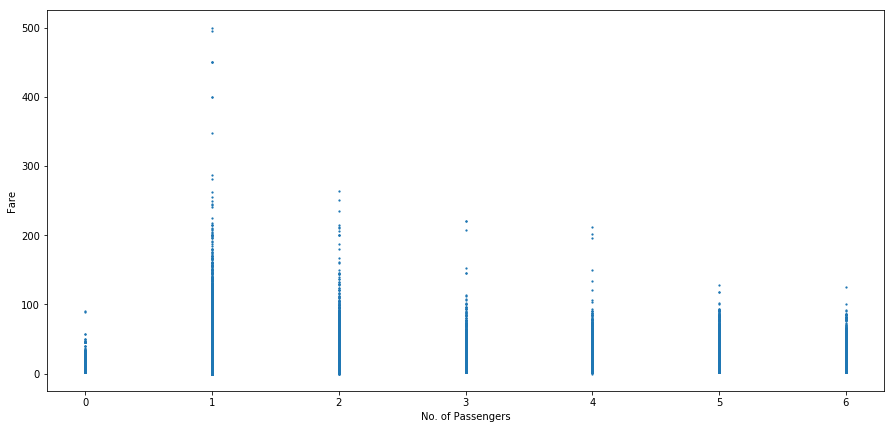

In [45]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

### 2. Does the date and time of pickup affect the fare?

Text(0,0.5,'Fare')

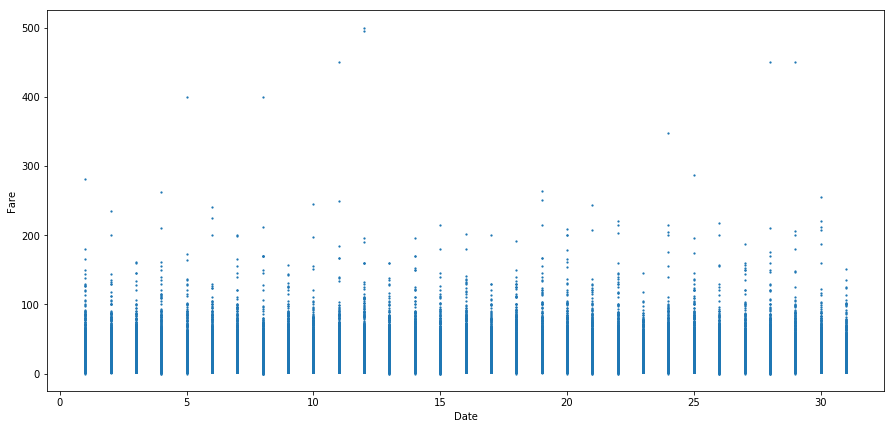

In [46]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0,0.5,'Frequency')

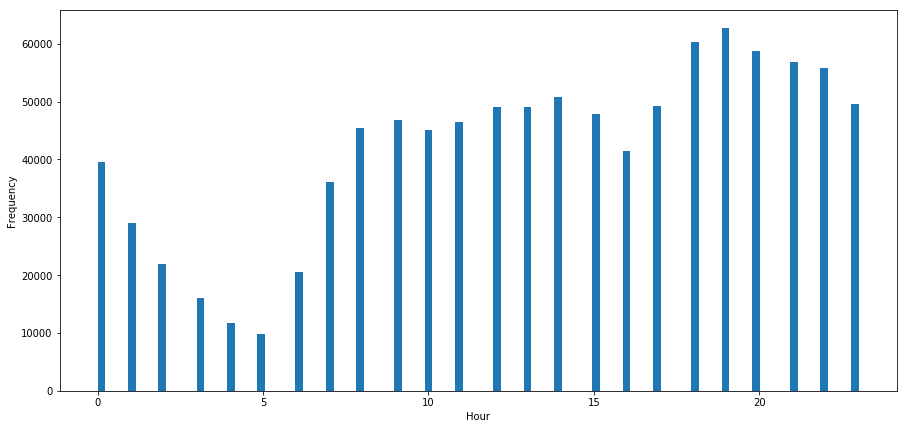

In [47]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0,0.5,'Fare')

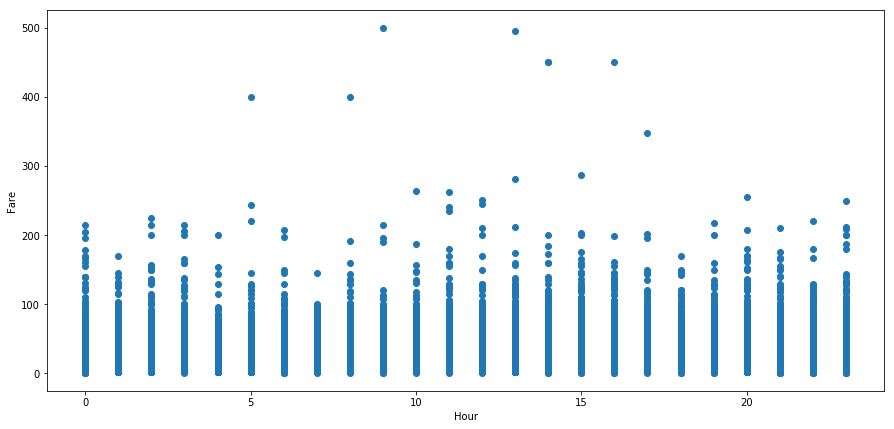

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 1PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic

### 3. Does the day of the week affect the fare

Text(0,0.5,'Frequency')

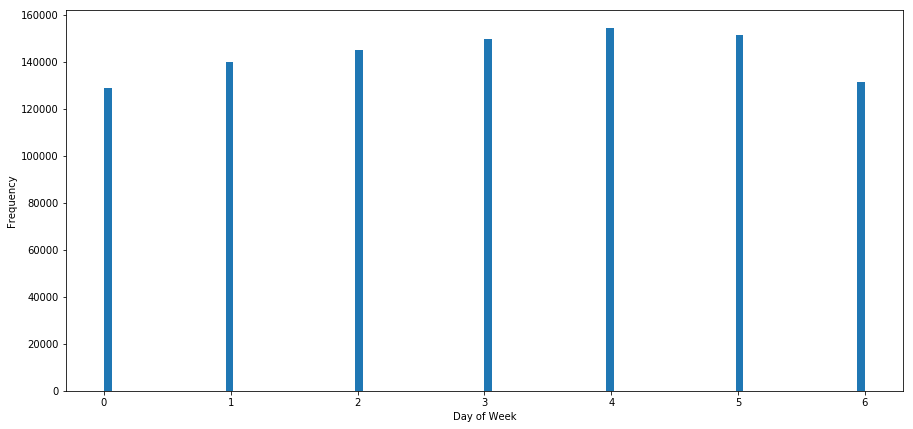

In [49]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Day of the week doesn't seem to have that much of an influence on the number of cab rides

Text(0,0.5,'Fare')

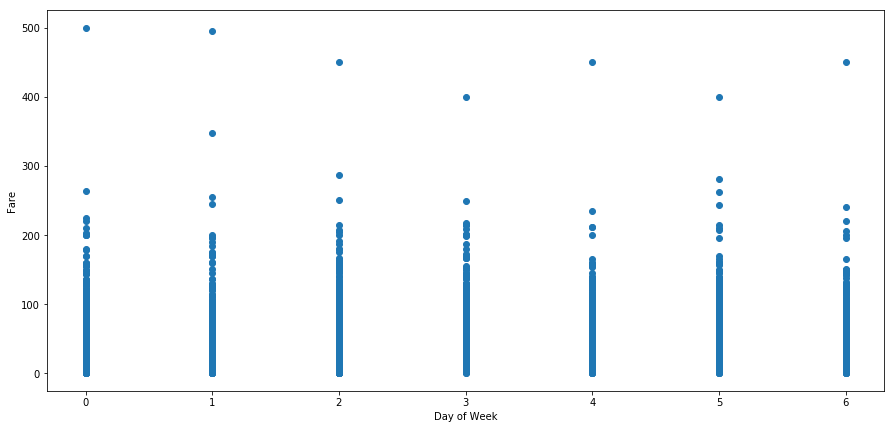

In [50]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'])
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday

In [51]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]

In [52]:
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'

In [53]:
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])

In [54]:
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [55]:
dist_bins.head()

,H_Distance,bins
11,0.0,0
15,0.0,0
26,0.0,0
105,0.0,0
124,0.0,0


In [56]:
Counter(dist_bins['bins'])

Counter({'0': 28481,
         '0-10': 920071,
         '100-200': 206,
         '11-50': 49073,
         '201-300': 5,
         '51-100': 147,
         '>300': 1937})

There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. 

These outliers could be because of typos or missing values in the latitude or longitude.

Remove fields of the following

* Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
* vice versa of point 1.
* Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [57]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0


In [58]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [59]:
train.shape

(999919, 14)

In [60]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [61]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11


In [62]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [63]:
train.shape

(999916, 14)

In [64]:
#Checking test data

test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


Check the H_Distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [65]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [66]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [67]:
high_distance.shape

(1938, 14)

However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

distance = (fare_amount - 2.5)/1.56

In [68]:
high_distance['H_Distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56,axis=1)

C:\Users\shivathk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [70]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [71]:
train.shape

(999916, 14)

Now we shall check for rows where the distance values are 0

In [72]:
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


We can see a few rows with distance =0. This could be due to 2 reasons

1. The cab waited the whole time and the passenger eventually cancelled. That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.
2. The pickup and drop co-ordinates were not entered. In other words, these are missing values!

28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices -

* $$2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri

* $$3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

#### SCENARIO 1

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [73]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0


In [74]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [75]:
train[(train['H_Distance']==0)].shape

(28663, 14)

#### SCENARIO 2

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [76]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,2.0,14.0


In [77]:
train=train.drop(rush_hour.index, axis=0)

In [78]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,5.0,30.0,3.0,0.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,8.0,21.0,3.0,23.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,1.0,7.0,2.0,22.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,2.0,27.0,4.0,2.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,6.0,17.0,2.0,3.0


In [79]:
Counter(non_rush_hour['fare_amount']<2.5)

Counter({False: 243})

Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

In [80]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
6297,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,11.0,15.0,0.0,9.0
9177,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,12.0,6.0,0.0,11.0
9621,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,1.0,6.0,22.0
11593,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,10.0,17.0,6.0,4.0
13571,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,3.0,9.0,0.0,12.0


In [81]:
#Counter(weekends['fa']<2.5)
Counter(weekends['fare_amount']<2.5)

Counter({False: 372})

#### SCENARIO 3

Fare is 0, but Distance is not 0. These values need to be imputed.

we can calculate the fare as I have the distance. I shall use the following formula

fare = 2.5 + 1.56(H_Distance)

In [82]:
scenario_3 =train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [83]:
len(scenario_3)

21

In [84]:
scenario_3['fare_amount'] = scenario_3.apply(lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1)

C:\Users\shivathk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
scenario_3['fare_amount']

10002      7.468230
27891      2.501660
47302      2.528736
175352     2.514421
211455     2.509022
211499     2.500838
266485     2.505469
386734     3.321137
431819     7.179423
489767     2.501201
495273     2.500662
520715     3.157114
561786    19.524533
670254     2.500662
681342     2.501577
760662     3.034632
762802    25.597788
788466    28.034391
895361     3.369958
938020     2.501202
957590     2.505506
Name: fare_amount, dtype: float64

In [86]:
train.update(scenario_3)

In [87]:
train.shape

(999910, 14)

#### SCENARIO 4

Fare is not 0, but Distance is 0. These values need to be imputed.

In [88]:
scenario_4=train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]
scenario_4

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [89]:
len(scenario_4)

28661

In [90]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<2.5)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [91]:
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [92]:
len(scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)])

27159

27159 rows need to be imputed using the following formula -

distance = (fare_amount - 2.5)/1.56

In [93]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [94]:
len(scenario_4_sub)

27159

In [95]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(lambda row: ((row['fare_amount']-2.50)/1.56), axis=1)


C:\Users\shivathk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
train.update(scenario_4_sub)

In [97]:
train.shape

(999910, 14)

In [98]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

### MODELLING AND PREDICTION

In [99]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [100]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [101]:
train_df, test_df = train_test_split(train, test_size = 0.2)

In [102]:
x_train = train_df.iloc[:,train.columns!='fare_amount']
y_train = train_df['fare_amount'].values

In [103]:
X_test  = test_df.drop("fare_amount", axis=1)
Y_test = test_df["fare_amount"]

In [104]:
 x_train.shape,y_train.shape,X_test.shape,Y_test.shape

((799928, 11), (799928,), (199982, 11), (199982,))

## RandomForest

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

predict tes data

In [106]:
y_randomf=rf.predict(X_test)

In [107]:
print(np.sqrt(mean_squared_error(Y_test,y_randomf)))

3.8439145696914987


In [109]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()


0.01634661368562566

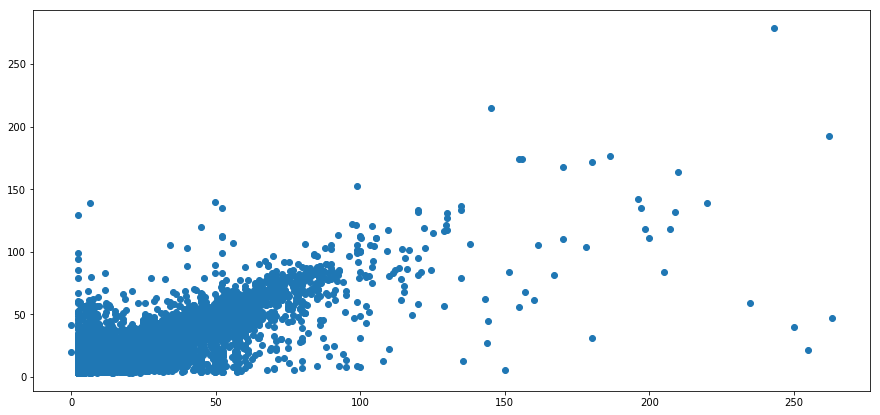

In [116]:
plt.figure(figsize=(15,7))
plt.scatter(Y_test,y_randomf)
plt.show()